## Protein folding in silico

In this tutorial we perform protein folding with PLEX.

There are multiple reasons we believe PLEX is a new standard for computational biology 🧫:
1. with a simple python interface, running containerised tools with your data is only a few commands away
2. the infrastructure of the compute network is fully open source - use the public network or work with us to set up your own node
3. every event on the compute network is tracked - no more results are lost in an interactive compute session. You can base your decisions and publications on fully reproducible results.
4. we made adding new tools to the network as easy as possible - moving your favorite tool to PLEX is one JSON document away.

In this tutorial, we'll walk through an example of how to use PLEX to predict a protein's 3D structure using [ColabFold](https://www.nature.com/articles/s41592-022-01488-1). We will use the sequence of the Streptavidin protein for this demo.

We will also walk through the process of minting a ProofOfScience NFT. These tokens represent on-chain, verifiable records of the compute job and its input/output data. This enables reproducible scientific results.

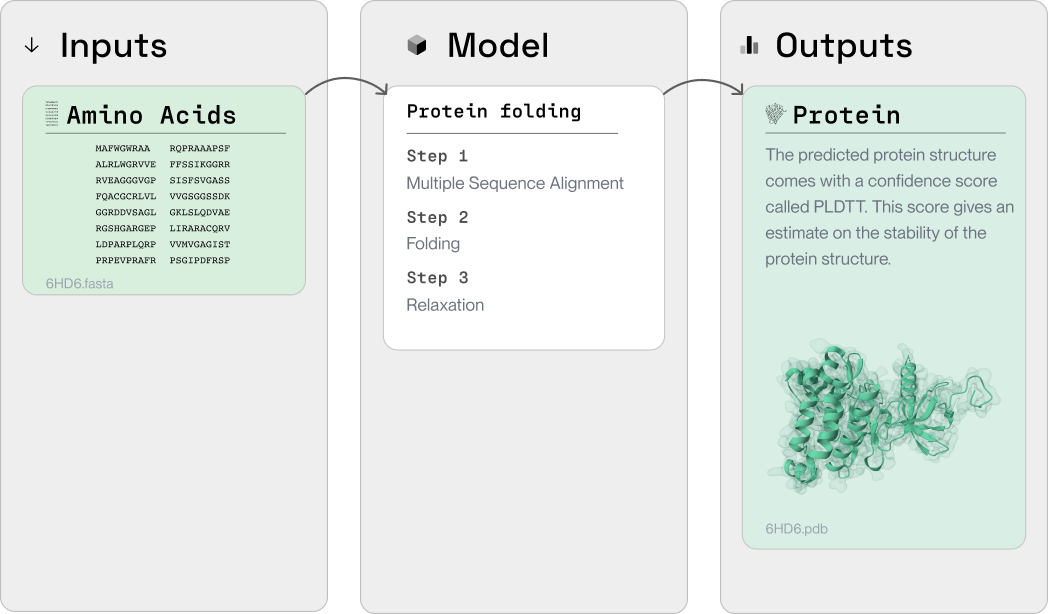

## Install PLEX

In [ ]:
!pip install PlexLabExchange

Then, create a directory where we can save our project files.


In [ ]:
import os

cwd = os.getcwd()
!mkdir project

dir_path = f"{cwd}/project"

## Download protein sequence

We'll download a `.fasta` file containing the sequence of the protein we want to fold. Here, we're using the sequence of Streptavidin.



In [ ]:
!wget https://rest.uniprot.org/uniprotkb/P22629.fasta -O {dir_path}/P22629.fasta # Streptavidin

## Fold the protein

With the sequence downloaded, we can now use ColabFold to fold the protein.



In [ ]:
from plex import CoreTools, plex_init

fasta_local_filepaths = [f"{dir_path}/P22629.fasta"]

initial_io_cid = plex_init(
    CoreTools.COLABFOLD_MINI.value,
    sequence=fasta_local_filepaths
)

This code initiates the folding process. We'll need to run it to complete the operation.

In [ ]:
from plex import plex_run

completed_io_cid, completed_io_filepath = plex_run(initial_io_cid, dir_path)

After the job is complete, we can retrieve and view the results. The state of each object is written in a JSON object. Every file has a unique content-address.



In [ ]:
import json

with open(completed_io_filepath, 'r') as f:
  data = json.load(f)
  pretty_data = json.dumps(data, indent=4, sort_keys=True)
  print(pretty_data)

The results can also be viewed using an IPFS gateway. Below, the state of the IO JSON is read using the ipfs.io gateway.

**Note:** Depending on how long it takes for the results to propagate to the ipfs.io nodes, the data may not be available immediately. The results can also be viewed on IPFS Desktop or by accessing IPFS through the Brave browser (ipfs://completed_io_cid)

In [ ]:
print(f"View this result on IPFS: https://ipfs.io/ipfs/{completed_io_cid}")

## Visualize the folded protein

In [ ]:
from plex import plex_vectorize

results = plex_vectorize(completed_io_cid, CoreTools.COLABFOLD_MINI.value)

print(results)
print(results['best_folded_protein']['filePaths']) # for local file path references
print(results['best_folded_protein']['cidPaths']) # IPFS path references

In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol

def show_pdbfile(pdbfile):
    viewer = py3Dmol.view()
    with open(pdbfile, 'r') as f:
        viewer.addModel(f.read(), 'pdb')
    viewer.setStyle({'cartoon': {'color':'spectrum'}})
    viewer.show()

# Use the function to show a protein from a PDB file
show_pdbfile(results['best_folded_protein']['filePaths'][0])

## Mint a ProofOfScience NFT

We can now mint a ProofOfScience token by providing the IPFS CID of the completed IO JSON to the `plex_mint` function.

In [ ]:
from plex import plex_mint

os.environ["RECIPIENT_WALLET"] = "" # enter your wallet address

# using the autotask webhook enables gasless minting
os.environ["AUTOTASK_WEBHOOK"] = "https://api.defender.openzeppelin.com/autotasks/e15b3f39-28f8-4d30-9bf3-5d569bdf2e78/runs/webhook/8315d17c-c493-4d04-a257-79209f95bb64/2gmqi9SRRAQMoy1SRdktai"

plex_mint(completed_io_cid)

print("View your ProofOfScience tokens here: https://testnets.opensea.io/account")